Loading Standard Modules

In [1]:
import numpy as np
import pandas as pd
import datetime
import calendar
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

Loading the dataset that contains the daily stock values of TSLA

In [2]:
df = pd.read_csv("../Data/TSLA.csv")
print(df.shape)
df.head()

(2639, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


 `date_to_weekday_name` function takes the date as an argument and returns the weekday name of that particular date

In [3]:
def date_to_weekday_name(date):
    date = date.split("-")
    year, month, day = int(date[0]), int(date[1]), int(date[2])
    weekday_idx = datetime.datetime(year, month, day).weekday()
    weekday = calendar.day_name[weekday_idx]
    return weekday

In [4]:
df["Weekday"] = df["Date"].apply(lambda x: date_to_weekday_name(x))
print(df.shape)
df.head()

(2639, 8)


,Date,Open,High,Low,Close,Adj Close,Volume,Weekday
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500,Tuesday
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500,Wednesday
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000,Thursday
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000,Friday
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500,Tuesday


In [5]:
df.drop(labels="Adj Close", inplace=True, axis=1)
print(df.shape)
df.head()

(2639, 7)


,Date,Open,High,Low,Close,Volume,Weekday
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,Tuesday
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,Wednesday
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,Thursday
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,Friday
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,Tuesday


In [6]:
friday_df = df[df["Weekday"] == "Friday"]
print(friday_df.shape)
friday_df.head()

(531, 7)


,Date,Open,High,Low,Close,Volume,Weekday
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,Friday
7,2010-07-09,3.516,3.580,3.310,3.480,20253000,Friday
12,2010-07-16,4.140,4.260,4.010,4.128,13106500,Friday
17,2010-07-23,4.238,4.312,4.212,4.258,3268000,Friday
22,2010-07-30,4.040,4.088,3.910,3.988,2134500,Friday


In [7]:
monday_df = df[df["Weekday"] == "Monday"]
print(monday_df.shape)
monday_df.head()

(495, 7)


,Date,Open,High,Low,Close,Volume,Weekday
8,2010-07-12,3.590,3.614,3.400,3.410,11012500,Monday
13,2010-07-19,4.274,4.450,4.184,4.382,12432500,Monday
18,2010-07-26,4.300,4.300,4.060,4.190,4611000,Monday
23,2010-08-02,4.100,4.194,4.066,4.184,3590500,Monday
28,2010-08-09,3.980,3.996,3.890,3.920,4063500,Monday


 `days_difference` functions returns the number of days between two dates

In [8]:
def days_difference(date1, date2):
    date1 = date1.split("-")
    date2 = date2.split("-")
    
    year1, month1, day1 = int(date1[0]), int(date1[1]), int(date1[2])
    year2, month2, day2 = int(date2[0]), int(date2[1]), int(date2[2])
    
    return (datetime.datetime(year1,month1,day1) - datetime.datetime(year2,month2,day2)).days

In [9]:
friday_monday = []
friday_monday_dates = []
for friday in friday_df.values:
    for monday in monday_df.values:
        if(days_difference(friday[0],monday[0]) == -3):
            friday_monday.append((float(friday[4]), float(monday[1])))
            friday_monday_dates.append(monday[0])
friday_monday = np.array(friday_monday)

In [11]:
friday_monday_change = (((friday_monday[:,1] - friday_monday[:,0])/friday_monday[:,0])*100)
friday_monday_change.shape

(479,)

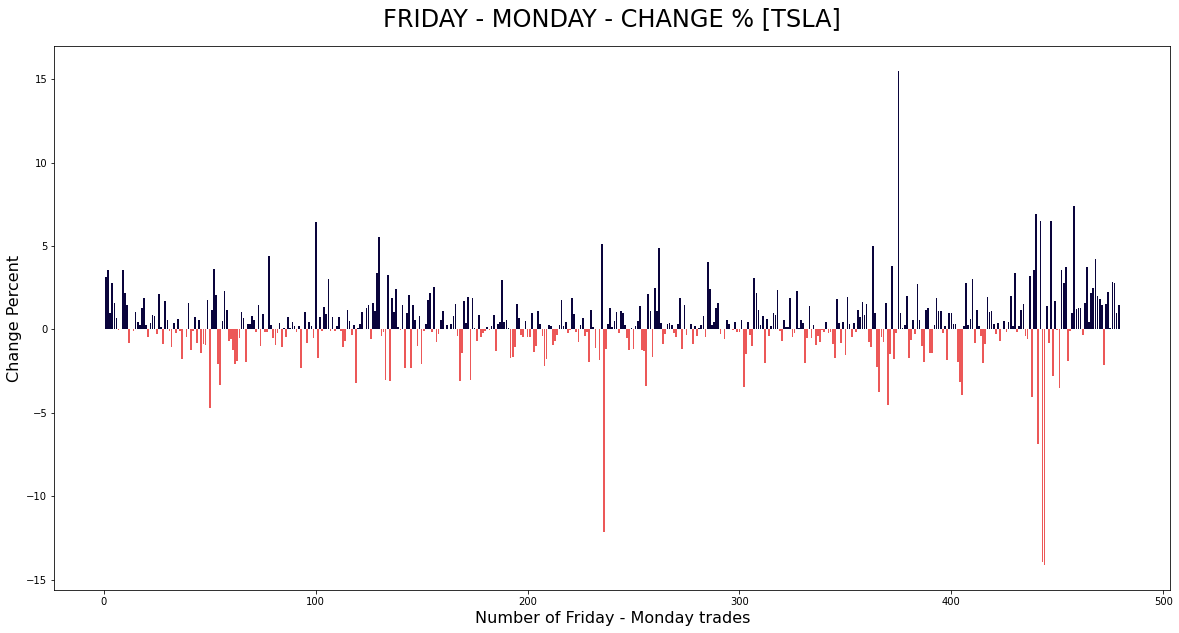

In [12]:
colors = []
for item in friday_monday_change:
    if item > 0:
        colors.append("#0a043c")
    else:
        colors.append("#ec5858")

plt.bar(np.arange(1,480), friday_monday_change, color=colors, label = "Friday - Monday - Change %")

plt.xlabel("Number of Friday - Monday trades", fontsize=16)

plt.ylabel("Change Percent", fontsize=16)

plt.title(label="FRIDAY - MONDAY - CHANGE % [TSLA]", fontsize=24, pad=20);

 Last 30 days analysis of Friday - Monday trades

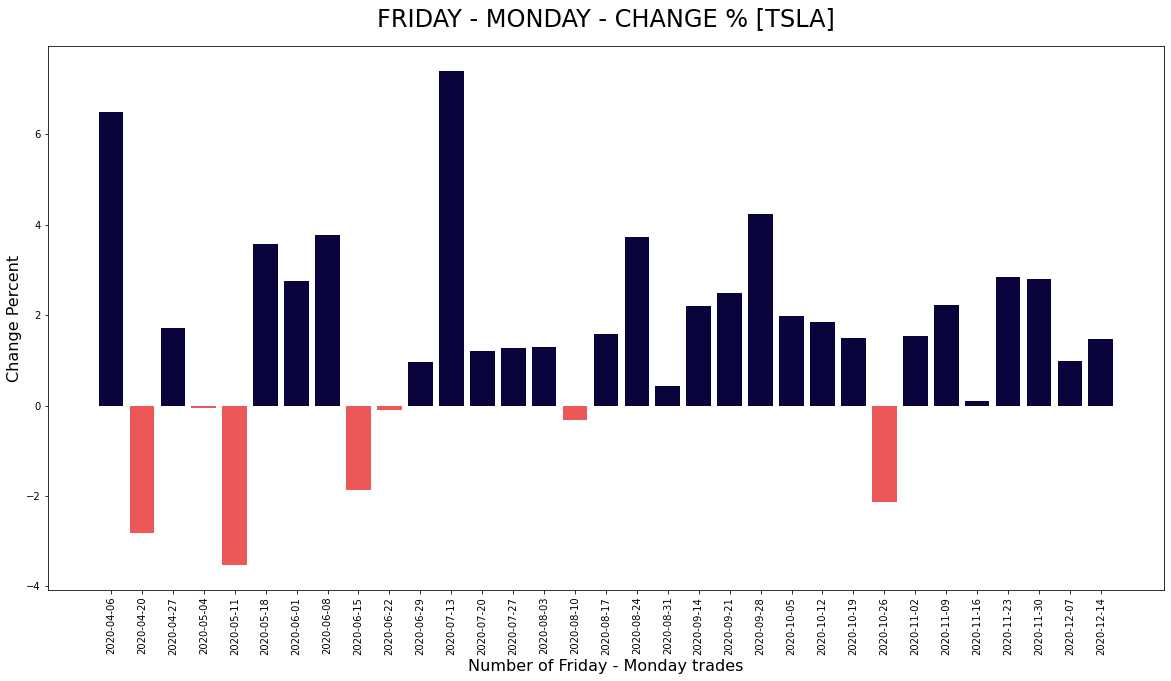

In [15]:
plt.bar(np.arange(1,480)[-33:], friday_monday_change[-33:], color=colors[-33:], label = "Friday - Monday - Change %")
plt.xticks(np.arange(1,480)[-33:], friday_monday_dates[-33:], rotation ='vertical')
plt.xlabel("Number of Friday - Monday trades", fontsize=16)
plt.ylabel("Change Percent", fontsize=16)
plt.title(label="FRIDAY - MONDAY - CHANGE % [TSLA]", fontsize=24, pad=20);